## Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.python.keras.utils.vis_utils import plot_model
import pydot
from tensorflow.keras.models import Model

## Sequential API

In [2]:
seq_model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                        tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                        tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

## Functional API

In [3]:
# instantiate the input Tensor
input_layer = tf.keras.Input(shape=(28, 28))

# stack the layers using the syntax: new_layer()(previous_layer)
flatten_layer = tf.keras.layers.Flatten()(input_layer)
first_dense   = tf.keras.layers.Dense(128, activation=tf.nn.relu)(flatten_layer)
output_layer  = tf.keras.layers.Dense(10,  activation=tf.nn.softmax)(first_dense)

# declare inputs and outputs
func_model = Model(inputs=input_layer, outputs=output_layer)

In [9]:
func_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Training the model

In [10]:
# prepare fashion mnist dataset
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [11]:
# configure, train 
func_model.compile(optimizer=tf.optimizers.Adam(),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

func_model.fit(training_images,
               training_labels,
               epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4979 - accuracy: 0.8241
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3768 - accuracy: 0.8634
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3384 - accuracy: 0.8775
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3131 - accuracy: 0.8837
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2963 - accuracy: 0.8921


In [12]:
# evaluate the model
func_model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3974 - accuracy: 0.8562


[0.39743462204933167, 0.8561999797821045]

## Multioutput model

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

## Utilities

In [25]:
def format_output(data):
    y1 = data.pop('Y1')
    y1 = np.array(y1)
    y2 = data.pop('Y2')
    y2 = np.array(y2)
    return y1, y2


def norm(x):
    return (x - train_stats['mean']) / train_stats['std']


def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(story.history[metric_name], color='blue', label=metric_name)
    plt.plot(story.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

## Prepare the Data

In [15]:
# Get the data from UCI dataset
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'

# Use pandas excel reader
df = pd.read_excel(URL)
df = df.sample(frac=1).reset_index(drop=True)

In [16]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.62,808.5,367.5,220.50,3.5,3,0.25,4,14.61,15.56
1,0.82,612.5,318.5,147.00,7.0,2,0.25,4,25.66,26.30
2,0.98,514.5,294.0,110.25,7.0,5,0.25,1,28.41,29.49
3,0.82,612.5,318.5,147.00,7.0,2,0.10,2,23.75,27.38
4,0.76,661.5,416.5,122.50,7.0,4,0.10,1,32.94,34.14


In [17]:
# Split the data into train and test with 80 train / 20 test
train, test = train_test_split(df, test_size=0.2)
train_stats = train.describe()

In [18]:
# Get Y1 and Y2 as the 2 outputs and format them as np arrays
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)

In [19]:
# Normalize the training and test data
norm_train_X = norm(train)
norm_test_X = norm(test)

## Model

In [20]:
# Define model layers.
input_layer = Input(shape=(len(train .columns),))
first_dense = Dense(units='128', activation='relu')(input_layer)
second_dense = Dense(units='128', activation='relu')(first_dense)

# Y1 output will be fed directly from the second dense
y1_output = Dense(units='1', name='y1_output')(second_dense)
third_dense = Dense(units='64', activation='relu')(second_dense)

# Y2 output will come via the third dense
y2_output = Dense(units='1', name='y2_output')(third_dense)

# Define the model with the input layer and a list of output layers
model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 128)          1152        ['input_2[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 128)          16512       ['dense_4[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 64)           8256        ['dense_5[0][0]']                
                                                                                            

## Configure parameters

In [21]:
optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=optimizer,
              loss={'y1_output': 'mse', 'y2_output': 'mse'},
              metrics={'y1_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y2_output': tf.keras.metrics.RootMeanSquaredError()})

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


## Train the Model

In [22]:
story = model.fit(norm_train_X,
                  train_Y,
                  epochs=500,
                  batch_size=10,
                  validation_data=(norm_test_X, test_Y))

Epoch 1/500
62/62 [==============================] - 1s 8ms/step - loss: 260.9981 - y1_output_loss: 127.6279 - y2_output_loss: 133.3702 - y1_output_root_mean_squared_error: 11.2973 - y2_output_root_mean_squared_error: 11.5486 - val_loss: 40.2689 - val_y1_output_loss: 15.4593 - val_y2_output_loss: 24.8095 - val_y1_output_root_mean_squared_error: 3.9318 - val_y2_output_root_mean_squared_error: 4.9809
Epoch 2/500
62/62 [==============================] - 0s 3ms/step - loss: 30.3911 - y1_output_loss: 12.3226 - y2_output_loss: 18.0685 - y1_output_root_mean_squared_error: 3.5104 - y2_output_root_mean_squared_error: 4.2507 - val_loss: 19.9279 - val_y1_output_loss: 9.5152 - val_y2_output_loss: 10.4128 - val_y1_output_root_mean_squared_error: 3.0847 - val_y2_output_root_mean_squared_error: 3.2269
Epoch 3/500
62/62 [==============================] - 0s 4ms/step - loss: 26.2206 - y1_output_loss: 10.0913 - y2_output_loss: 16.1292 - y1_output_root_mean_squared_error: 3.1767 - y2_output_root_mean_squ

## Evaluate the Model and Plot Metrics

In [23]:
# Test the model and print loss and mse for both outputs
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_test_X, y=test_Y)
print("Loss = {}, Y1_loss = {}, Y1_mse = {}, Y2_loss = {}, Y2_mse = {}".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))

5/5 [==============================] - 0s 3ms/step - loss: 0.6361 - y1_output_loss: 0.1578 - y2_output_loss: 0.4782 - y1_output_root_mean_squared_error: 0.3973 - y2_output_root_mean_squared_error: 0.6916
Loss = 0.6360607743263245, Y1_loss = 0.15781797468662262, Y1_mse = 0.3972631096839905, Y2_loss = 0.4782428443431854, Y2_mse = 0.6915510296821594


5/5 [==============================] - 0s 3ms/step


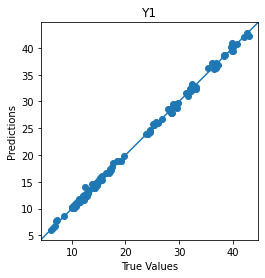

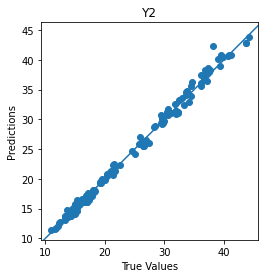

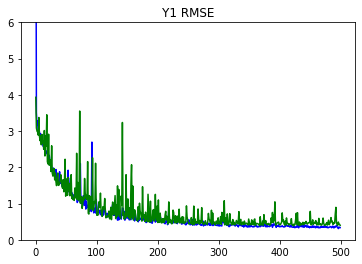

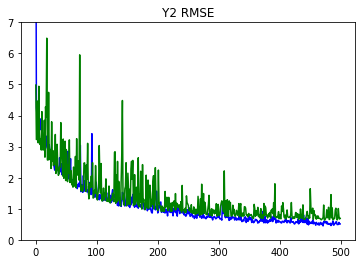

In [26]:
# Plot the loss and mse
Y_pred = model.predict(norm_test_X)
plot_diff(test_Y[0], Y_pred[0], title='Y1')
plot_diff(test_Y[1], Y_pred[1], title='Y2')
plot_metrics(metric_name='y1_output_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)